In [ ]:
#
# Analyzing Returns from Geometric Brownian Motion
#
# Fernando Ecumbi
# Derivatives Analytics with Python
#

In [3]:
import math
import numpy as np
import pandas as pd
import scipy.stats as scs
import statsmodels.api as sm
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['font.family'] = 'serif'

import warnings
warnings.filterwarnings("ignore")

In [4]:
#
# helper Function
#

In [5]:
def dN(x, mu, sigma):
    """ Probability density function of a normal random variable x

        Parameters
        ==============
        mu: float
            expected value
        sigma: float
            standard deviation

        Returns
        =========b
        pdf: float
            value of probability density function

    """
    z = (x - mu)/sigma
    pdf = np.exp(-0.5*z**2)/math.sqrt(2*math.pi*sigma**2)
    return pdf

In [6]:
#
# Simulate a Number of Years of Daily Stock Quotes
#

In [7]:
def simulate_gbm():
    # model parameters
    SO = 100.0  # initial index level
    T = 10.0  # time horizon
    r = 0.05  # risk-less short rate
    vol = 0.2  # instantaneous volatility

    # simulation parameters
    np.random.seed(250000)
    gbm_dates = pd.date_range(start='30/09/2004',
                                end='30/09/2014',
                                freq='B')
    M = len(gbm_dates)  # time steps
    I = 1 # index level paths
    dt = 1/252  # fixed for simplicity
    df = math.exp(-r*dt)  # discount factor

    # stock prices paths
    rand = np.random.standard_normal((M,I)) # random numbers
    s = np.zeros_like(rand) # stock matrix
    s[0] = SO  # initial values
    for t in range(1, M):  # stock price paths
        s[t] = s[t-1]*np.exp((r-vol**2/2)*dt
                            + vol*rand[t]*math.sqrt(dt))

    gbm = pd.DataFrame(s[:, 0], index=gbm_dates, columns =['index'])
    gbm['returns'] = np.log(gbm['index']/gbm['index'].shift(1))


    # Realized Volatility (eg. as defined for variance swaps)
    gbm['rea_var'] = 252 * np.cumsum(gbm['returns']**2)/np.arange(len(gbm))
    gbm['rea_vol'] = np.sqrt(gbm['rea_var'])
    gbm = gbm.dropna()

    return gbm

In [8]:
# assign the simulate Daily Stock Quotes to a data varibale
data = simulate_gbm()

data.tail() # display last 5 rows of the dataset

,index,returns,rea_var,rea_vol
2014-09-24,120.239071,0.009166,0.040778,0.201937
2014-09-25,117.796679,-0.020522,0.040804,0.201999
2014-09-26,118.943586,0.009689,0.040797,0.201983
2014-09-29,119.525066,0.004877,0.040784,0.201950
2014-09-30,121.003926,0.012297,0.040783,0.201947


In [9]:
# Return Sample Statistics and Normality Tests

def print_statistics(data):

    print("RETURN SAMPLE STATISTICS")
    print ("---------------------------------------------")
    print ("Mean of Daily Log Returns %9.6f" % np.mean(data['returns']))
    print ("Std of Daily Log Returns %9.6f" % np.std(data['returns']))
    print("Mean of Annua. Log Returns %9.6f" % (np.mean(data['returns']) * 252))
    print ("Std of Annua. Log Returns %9.6f" % \
                (np.std(data['returns']) * math.sqrt(252)))
    print( "---------------------------------------------")
    print("Skew of Sample Log Returns %9.6f" % scs.skew(data['returns']))
    print ("Skew Normal Test p-value   %9.6f" % scs.skewtest(data['returns'])[1])
    print("---------------------------------------------")
    print("Kurt of Sample Log Returns %9.6f" % scs.kurtosis(data['returns']))
    print ("Kurt Normal Test p-value %9.6f" % \
                        scs.kurtosistest(data['returns'])[1])
    print("---------------------------------------------")
    print ("Normal Test p-value %9.6f" % \
                scs.normaltest(data['returns'])[1])
    print("---------------------------------------------")
    print("Realized Volatility%9.6f" % data['rea_vol'].iloc[-1])
    print ("Realized Variance%9.6f" % data['rea_var'].iloc[-1])


print_statistics(data)

RETURN SAMPLE STATISTICS
---------------------------------------------
Mean of Daily Log Returns  0.000073
Std of Daily Log Returns  0.012721
Mean of Annua. Log Returns  0.018422
Std of Annua. Log Returns  0.201944
---------------------------------------------
Skew of Sample Log Returns -0.016447
Skew Normal Test p-value    0.730950
---------------------------------------------
Kurt of Sample Log Returns  0.120578
Kurt Normal Test p-value  0.206628
---------------------------------------------
Normal Test p-value  0.424617
---------------------------------------------
Realized Volatility 0.201947
Realized Variance 0.040783


In [10]:
#
# Graphical Output
#

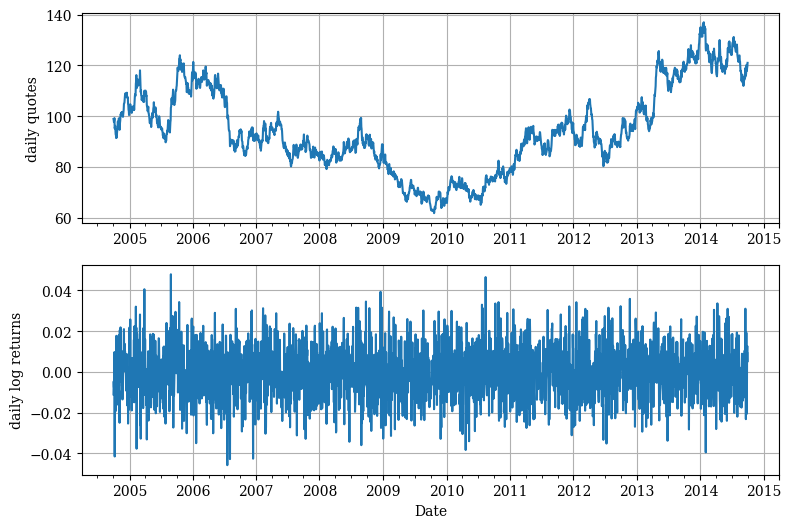

In [11]:
# daily quotes and log returns

def quotes_returns(data):
    ''' Plots quotes and returns. '''
    plt.figure(figsize=(9, 6))
    plt.subplot(211)
    data['index'].plot()
    plt.ylabel('daily quotes')
    plt.grid(True)
    plt.axis('tight')

    plt.subplot(212)
    data['returns'].plot()
    plt.ylabel('daily log returns')
    plt.xlabel('Date')
    plt.grid(True)
    plt.axis('tight')


quotes_returns(data)

**FIGURE 1.1**  DAX index level quotes and daily log returns over the period from 01.October 2004 to 30,September 20114

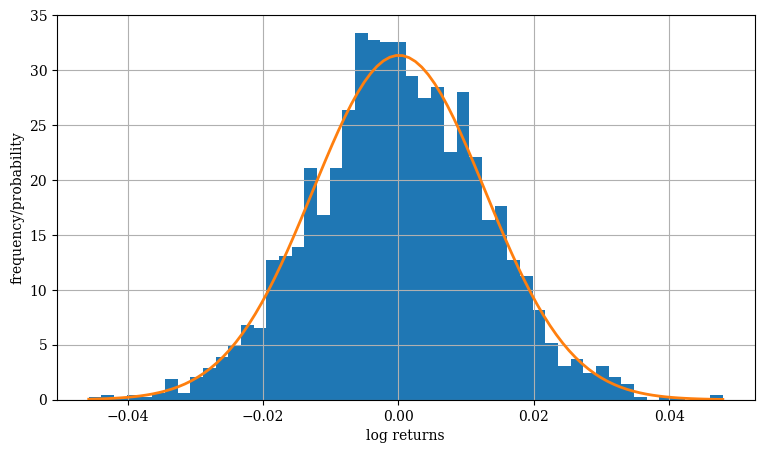

In [12]:
# histogram of annualized daily log returns
def return_histogram(data):
    ''' Plots a histogram of the returns. '''
    plt.figure(figsize=(9, 5))
    x = np.linspace(min(data['returns']), max(data['returns']), 100)
    plt.hist(np.array(data['returns']), bins=50, density=True)
    y = dN(x, np.mean(data['returns']), np.std(data['returns']))
    plt.plot(x, y, linewidth=2)
    plt.xlabel('log returns')
    plt.ylabel('frequency/probability')
    plt.grid(True)

return_histogram(data)

**FIGURE 1.2**  Histogram of the daily log returns of the DAX over the period from 01. October 2004 to 30. September 2014 (bars) and for comparison the probability density function of the normal distribution with the sample mean and volatility (line)

<Figure size 900x500 with 0 Axes>

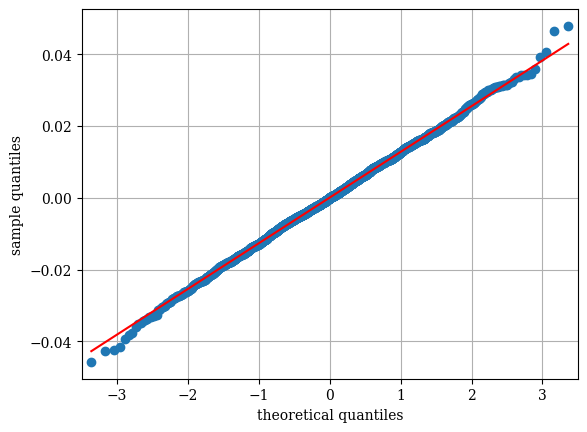

In [13]:
# Q-Q plot of annualized daily log returns
def return_qqplot(data):
    ''' Generates a Q-Q plot of the returns.'''
    plt.figure(figsize=(9, 5))
    sm.qqplot(data['returns'], line='s')
    plt.grid(True)
    plt.xlabel('theoretical quantiles')
    plt.ylabel('sample quantiles')

return_qqplot(data)

**FIGURE 1.3** Quantile-quantile plot of the daily log returns of the DAX over the period from 01. October 2004 to 30. September 2014

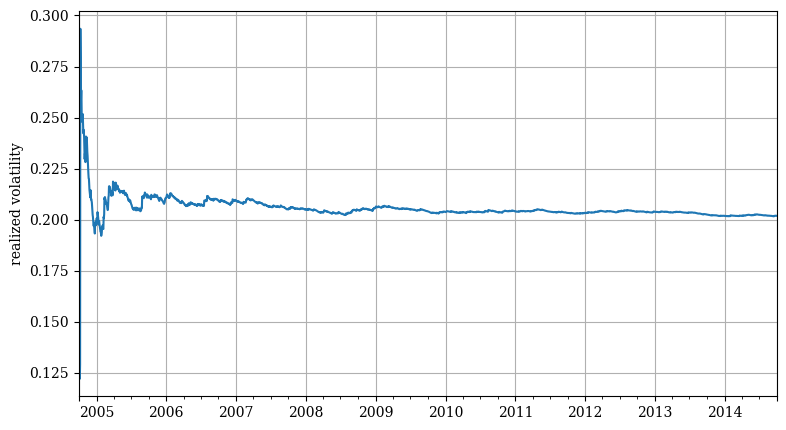

In [14]:
# realized volatility

def realized_volatility(data):
    ''' Plots the realized volatility. '''
    plt.figure(figsize=(9, 5))
    data['rea_vol'].plot()
    plt.ylabel('realized volatility')
    plt.grid(True)

realized_volatility(data)

**FIGURE 1.4** Realized volatility for the DAX over the period from 01. October 2004 to 30. September 2014

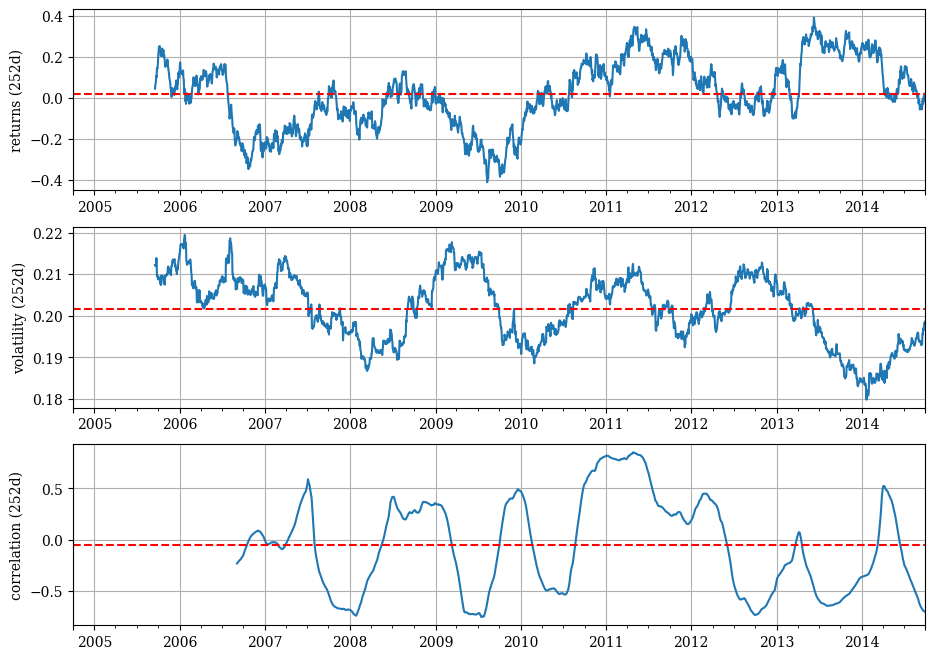

In [15]:
# mean return, volatility and correlation (252 days moving = 1 year)
def rolling_statistics(data):
    ''' Calculates and plots rolling statistics (mean, std, correlation). '''
    plt.figure(figsize=(11, 8))

    plt.subplot(311)
    #mr = pd.rolling_mean(data['returns'], 252) * 252
    mr = (data['returns'].rolling(window=252).mean())*252
    mr.plot()
    plt.grid(True)
    plt.ylabel('returns (252d)')
    plt.axhline(mr.mean(), color='r', ls='dashed', lw=1.5)

    plt.subplot(312)
    #vo = pd.rolling_std(data['returns'], 252) * math.sqrt(252)
    vo = (data['returns'].rolling(window=252).std()) * math.sqrt(252)
    vo.plot()
    plt.grid(True)
    plt.ylabel('volatility (252d)')
    plt.axhline(vo.mean(), color='r', ls='dashed', lw=1.5)
    vx = plt.axis()

    plt.subplot(313)
    #co = pd.rolling_corr(mr, vo, 252)
    co = mr.rolling(252).corr(vo)
    co.plot()
    plt.grid(True)
    plt.ylabel('correlation (252d)')
    cx = plt.axis()
    plt.axis([vx[0], vx[1], cx[2], cx[3]])
    plt.axhline(co.mean(), color='r', ls='dashed', lw=1.5)


rolling_statistics(data)

**FIGURE 1.5** Rolling mean log return (252 days), rolling volatility (252 days) and rolling correlation between both (252 days); dashed lines are averages over the whole period shown